 # Unsupervised Learning
 
 We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

*   Fresh: annual spending (m.u.) on fresh products
*   Milk: annual spending (m.u.) on milk products
*   Grocery: annual spending (m.u.) on grocery products
*   Frozen: annual spending (m.u.) on frozen products
*   Detergents_Paper: annual spending (m.u.) on detergents and paper products
*   Delicatessen: annual spending (m.u.) on delicatessen products
*   Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
*   Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/Wholesale_Customers_Data.csv', sep=',')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data["Channel"].unique()

array([2, 1], dtype=int64)

In [5]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

<AxesSubplot:>

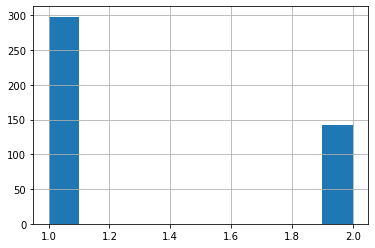

In [6]:
data.Channel.hist()

In [7]:
#checking Data types
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
#Preserving the original data
original_data = data.copy()

In [11]:
# we can drop Channel and Region as we are focusing on the numerical columns
float_columns = [x for x in data.columns if x not in ['Channel','Region']]

In [12]:
data[float_columns].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
matrix_corr = data[float_columns].corr()
# Strip the diagonal for future examination
for x in range(matrix_corr.shape[0]):
    matrix_corr.iloc[x,x] = 0.0
    
matrix_corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


In [14]:
#finding Strong correlated features
matrix_corr.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

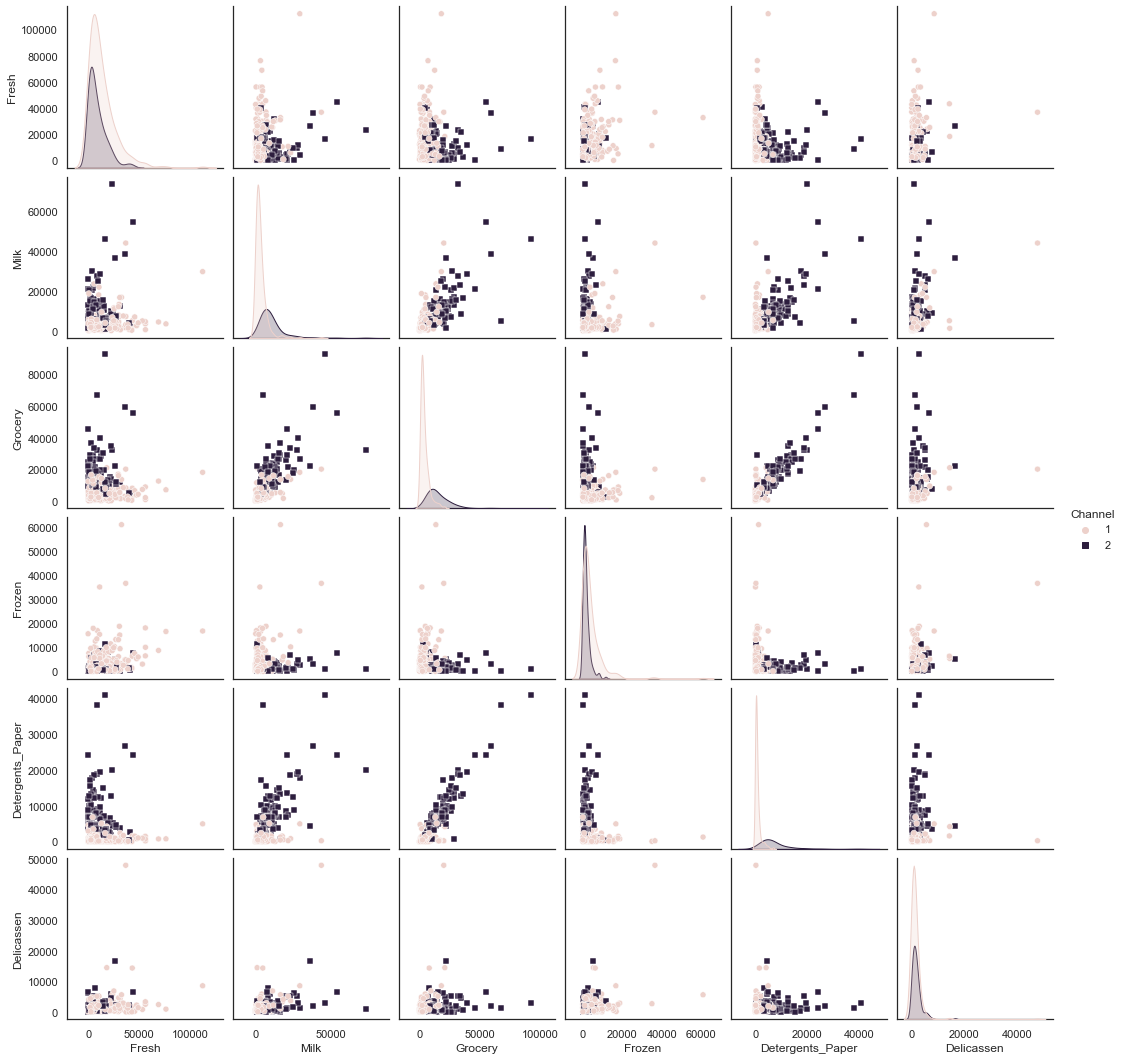

In [15]:
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

sns.pairplot(data[float_columns + ['Channel']], 
             hue='Channel',
             markers=["o", "s"]);

In [16]:
#checking skew values
data_skew = data.skew().sort_values(ascending=False)
data_skew

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
Channel              0.760951
Region              -1.283627
dtype: float64

In [17]:
#Using log Transformer and Scaling data with pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the data
#data_pipe = pipeline.fit_transform(data)

data[float_columns] = pipeline.fit_transform(data[float_columns])

In [18]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.787076,0.717315,0.750579,0.272291,0.704748,0.619005
1,2,3,0.729947,0.719518,0.773997,0.543498,0.727298,0.649139
2,2,3,0.719687,0.704513,0.752184,0.583577,0.734394,0.807256
3,1,3,0.791565,0.426513,0.692596,0.709778,0.524784,0.649856
4,2,3,0.843653,0.636636,0.745685,0.646361,0.660499,0.763182


In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [20]:
(data[['Channel','kmeans']]
 .groupby(['kmeans','Channel'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans Channel        
0      1           254
       2             6
1      1            44
       2           136

In [21]:
#Now we can fit K-Means models with cluster values ranging from 1 to 25. For each model,
#we will store the number of clusters and the inertia value. After that,
#we will plot the cluster number vs inertia.
kmeans_list = list()

for num_clust in range(1,26):
    km = KMeans(n_clusters=num_clust, random_state = 42)
    km = km.fit(data[float_columns])
    
    kmeans_list.append(pd.Series({'clusters': num_clust,
                                 'inertia': km.inertia_,
                                 'model': km}))
data['kmeans'] = km.predict(data[float_columns])

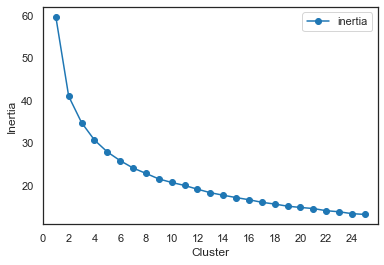

In [22]:
plot_data = (pd.concat(kmeans_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,26,2))
ax.set_xlim(0,26)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [29]:
# Now we can build an agglomerative clustering model

from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

y = (data['Channel']).astype(int)
X_with_kmeans = data.drop(['agglom', 'Channel', 'Region'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9635714285714286"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9610714285714286"


In [31]:
y = (data['Channel']).astype(int)
X_with_agglom = data.drop(['kmeans', 'Channel', 'Region'], axis=1)
X_without_agglom = X_with_agglom.drop('agglom', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

estimator = RandomForestClassifier()
roc_with_agglom = get_avg_roc_10splits(estimator, X_with_agglom, y)
roc_without_agglom = get_avg_roc_10splits(estimator, X_without_agglom, y)
print("Without agglomerative cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_agglom))
print("Using agglomerative cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_agglom))

Without agglomerative cluster as input to Random Forest, roc-auc is "0.963095238095238"
Using agglomerative cluster as input to Random Forest, roc-auc is "0.9657142857142856"


In [32]:
# Now we can build Meanshift model
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth=2)
mean_shift = mean_shift.fit(data[float_columns])
data['mean_shift'] = mean_shift.fit_predict(data[float_columns])

In [33]:
y = (data['Channel']).astype(int)
X_with_mean_shift = data.drop(['kmeans', 'agglom','Channel', 'Region'], axis=1)
X_without_mean_shift = X_with_mean_shift.drop('mean_shift', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)
estimator = RandomForestClassifier()
roc_with_mean_shift = get_avg_roc_10splits(estimator, X_with_mean_shift, y)
roc_without_mean_shift = get_avg_roc_10splits(estimator, X_without_mean_shift, y)
print("Without MeanShift cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_mean_shift))
print("Using MeanShift cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_mean_shift))

Without MeanShift cluster as input to Random Forest, roc-auc is "0.9629761904761904"
Using MeanShift cluster as input to Random Forest, roc-auc is "0.9669047619047622"


In [34]:
comparison = pd.DataFrame({'Algorithm': ["KMeans","Aglomerative", "MeanShift"],
                                 'Without Clustering': [round(roc_without_agglom,4),round(roc_without_kmeans,4),round(roc_without_mean_shift,4)],
                                 'With Clustering':[round(roc_with_agglom,4),round(roc_with_kmeans,4),round(roc_with_mean_shift,4)]})
comparison

,Algorithm,Without Clustering,With Clustering
0,KMeans,0.9631,0.9657
1,Aglomerative,0.9636,0.9611
2,MeanShift,0.9630,0.9669


# Discussion:
We have evaluated three clustering algorithms such as KMeans, Agglomerative and Mean Shift. Comparing three models depending on their ROC curves, it is observed that MeanShift Algorithm shows the better results. 